# Project 5: Statistical Analysis

## 1. Data Exploring

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from scipy.stats import ttest_1samp

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## 2.Data Cleaning & Manipulation

It begings with the identification of the columns with the highest percentage of null data.

In [7]:
null = ((df.isnull().sum()/df.shape[0])*100).sort_values(ascending = False)

null.head(21)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
Functional       0.000000
dtype: float64

The variables with a high percentage of null values are the following: 


    1. Pool QC : Pool Quality >> Pool Area
    2. MiscFeature : Miscellaneous feature not covered in other categories
    3. Alley : Type of alley access to property
    4. Fence : Fence quality
    5. FireplaceQu : Fireplace quality >> Fireplaces: Number of Fireplaces
    6. Lot Frontage : Linear feet of street connected to property

They describe features that not all houses have, and that surely affect on the price, nevertheless, there are other columns that provide 
related and more valuable information. So, we'll review each one.




        2.1 Review of columns with a major number of null values: count of null values & ANOVA

           2.1.1 PoolArea & PoolQC

In [8]:

#The prescence of null values radicates in the lack of pool in the property, and in fact can be stated by PoolArea. 

df[['SalePrice','PoolArea','PoolQC']].notnull().sum()

SalePrice    1460
PoolArea     1460
PoolQC          7
dtype: int64

In [9]:
#To identify the importance of each column, an ANOVA test is performed

df_pool = df[['SalePrice','PoolArea','PoolQC']][df.PoolQC.notnull()]

model = ols('SalePrice ~ C(PoolQC)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(PoolQC),1.143135e+11,2.0,1.627469,0.303985
Residual,1.404801e+11,4.0,NaN,NaN


In [10]:
df_pool = df[['SalePrice','PoolArea','PoolQC']]

model = ols('SalePrice ~ C(PoolArea)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(PoolArea),3.356503e+11,7.0,7.847318,2.341047e-09
Residual,8.872261e+12,1452.0,NaN,NaN


In [11]:
#The p-value from the ANOVA test for Pool Area, denote its statistical importance. PoolQC will be dropped. 

        2.1.2 MiscFeatures

In [12]:
df.MiscFeature.nunique()

4

In [13]:
df.MiscFeature.isnull().sum()

1406

In [14]:
df_misc = df[['SalePrice','MiscFeature']].notnull()

model = ols('SalePrice ~ C(MiscFeature)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(MiscFeature),1.705983e+10,3.0,2.157324,0.104728
Residual,1.317978e+11,50.0,NaN,NaN


           2.1.3 Alley

In [15]:
df.Alley.isnull().sum()

1369

In [16]:
df_misc = df[['SalePrice','Alley']].notnull()

model = ols('SalePrice ~ C(Alley)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Alley),4.721637e+10,1.0,35.56206,4.899826e-08
Residual,1.181669e+11,89.0,NaN,NaN


        2.1.4 Fence

In [17]:
df_misc = df[['SalePrice','Fence']].notnull()

model = ols('SalePrice ~ C(Fence)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Fence),5.494735e+10,3.0,4.948159,0.002313
Residual,1.025325e+12,277.0,NaN,NaN


        2.1.5 FireQu

In [18]:
df_misc = df[['SalePrice','FireplaceQu']].notnull()

model = ols('SalePrice ~ C(FireplaceQu)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(FireplaceQu),6.561883e+11,4.0,24.398929,5.016300e-19
Residual,5.143505e+12,765.0,NaN,NaN


In [19]:
df_misc = df[['SalePrice','Fireplaces']].notnull()

model = ols('SalePrice ~ C(Fireplaces)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Fireplaces),2.137691e+12,3.0,146.741176,4.421001e-83
Residual,7.070221e+12,1456.0,NaN,NaN


        2.1.6 LotFrontage

In [20]:
df_misc = df[['SalePrice','LotFrontage']].notnull()

model = ols('SalePrice ~ C(LotFrontage)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(LotFrontage),3.147630e+12,109.0,6.06225,1.924845e-58
Residual,5.196944e+12,1091.0,NaN,NaN


In [21]:
df_misc = df[['SalePrice','LotArea']].notnull()

model = ols('SalePrice ~ C(LotArea)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(LotArea),8.463582e+12,1072.0,4.104925,6.590820e-50
Residual,7.443294e+11,387.0,NaN,NaN


In [22]:
df.LotArea.isnull().sum()

0

After the analysis the 6 variables with the major amount of null values will be dropped.

In [23]:
#The p-value and the ANOVA test for Pool Area, denote its statistical importance. PoolQC will be dropped. 

df_1 = df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis = 1)
df_1.shape

(1460, 75)

In [24]:
df_1.shape

(1460, 75)

        2.2 Treatment of Variables with Minor amount of null values

            2.2.1 Garage

- GarageType: Garage location*
- GarageYrBlt: Year garage was built *
- GarageFinish: Interior finish of the garage*
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality*
- GarageCond: Garage condition*

In [25]:
df_1[['GarageType', 'GarageFinish', 'GarageQual','GarageCond']].head(3)

,GarageType,GarageFinish,GarageQual,GarageCond
0,Attchd,RFn,TA,TA
1,Attchd,RFn,TA,TA
2,Attchd,RFn,TA,TA


In [26]:
df_gar = df[['GarageType','GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual','GarageCond']][df.GarageQual.notnull()]

model = ols('SalePrice ~ C(GarageQual)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(GarageQual),2.332568e+11,4.0,9.570389,1.240803e-07
Residual,8.372044e+12,1374.0,NaN,NaN


In [27]:
df_1.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [28]:
df_1.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [29]:
df_1.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [30]:
df_1 = df_1.drop(['GarageYrBlt'],axis = 1)
df_1.shape

(1460, 74)

In [31]:
garage = ['GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual','GarageCond']

for column in garage:
    df_1[column] = df_1[column].fillna('None')

In [32]:
df_1.GarageQual.unique()

array(['TA', 'Fa', 'Gd', 'None', 'Ex', 'Po'], dtype=object)

            2.2.2 Basement

- BsmtFinType2: Quality of second finished area (if present)    
- BsmtExposure : Walkout or garden level basement walls 
- BsmtQual : Height of the basement
- BsmtCond : General condition of the basement     
- BsmtFinType1 : Quality of basement finished area

In [33]:
df_1[['BsmtFinType2', 'BsmtFinType1', 'BsmtExposure','BsmtQual','BsmtCond']].head(3)

,BsmtFinType2,BsmtFinType1,BsmtExposure,BsmtQual,BsmtCond
0,Unf,GLQ,No,Gd,TA
1,Unf,ALQ,Gd,Gd,TA
2,Unf,GLQ,Mn,Gd,TA


In [34]:
df_bsmt = df[['BsmtFinType2', 'BsmtFinType1', 'BsmtExposure','BsmtQual','BsmtCond']][df.BsmtQual.notnull()]

model = ols('SalePrice ~ C(BsmtQual)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(BsmtQual),4.066554e+12,3.0,392.913506,9.610615e-186
Residual,4.895429e+12,1419.0,NaN,NaN


In [35]:
bsmt = ['BsmtFinType2', 'BsmtFinType1', 'BsmtExposure','BsmtQual','BsmtCond']

for column in bsmt:
    df_1[column] = df_1[column].fillna('None')

In [36]:
df_1.BsmtFinType2.unique()

array(['Unf', 'BLQ', 'None', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [37]:
df_1.BsmtFinType2.isnull().sum()

0

            2.2.3 Masonry

- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet 

In [38]:
df_1[['MasVnrType', 'MasVnrArea']].head(3)

,MasVnrType,MasVnrArea
0,BrkFace,196.0
1,None,0.0
2,BrkFace,162.0


In [39]:
df_1['MasVnrType'] = df_1['MasVnrType'].fillna('None')
df_1['MasVnrArea'] = df_1['MasVnrArea'].fillna(0)

             2.2.4 Electrical

In [40]:
df_1.Electrical.head()

0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: Electrical, dtype: object

In [41]:
df_1.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [42]:
df_pool = df_1[['Electrical', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual','GarageCond']][df_1.Electrical.notnull()]

model = ols('SalePrice ~ C(Electrical)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Electrical),5.494534e+11,4.0,23.067673,1.663249e-18
Residual,8.658278e+12,1454.0,NaN,NaN


In [43]:
df_1['Electrical'] = df_1['Electrical'].fillna('None')

In [44]:
df_1.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', 'None'], dtype=object)

In [45]:
df_1.Electrical.isnull().sum()

0

In [46]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## 3. Correlations

In order to select the most important variables to the SalePrice, the correlation of the whole df to SalePrice will be obtained. 

In [80]:
corr = df_1[df_1.columns[1:]].corr()['SalePrice'][:].sort_values(ascending = False).reset_index()
corr

,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897


In [85]:
df_corr = df_1[corr[corr['SalePrice']>0.5]['index']]
df_corr

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,2000
1456,210000,6,2073,2,500,1542,2073,2,7,1978,1988
1457,266500,7,2340,1,252,1152,1188,2,9,1941,2006
1458,142125,5,1078,1,240,1078,1078,1,5,1950,1996


Through this analysis, and with the objective of select the most important and influential variables over the Sales price, we could select those with a corr value > 0.45. 

They could be used for linear regression. 

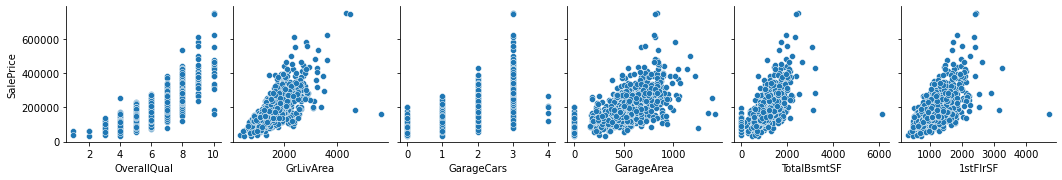

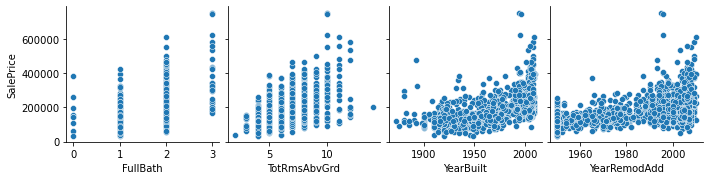

In [86]:
sns.pairplot(data = df_corr, y_vars = ['SalePrice'], x_vars = df_corr.columns[1:7])
sns.pairplot(data = df_corr, y_vars = ['SalePrice'], x_vars = df_corr.columns[7:14])

It can be visually appreciated the linear correspondence between the variables and the SalePrice

In [87]:
df_corr.TotRmsAbvGrd.unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14])

## 4. ANOVA

Let's review the statistical significance of the variables.

We'll review just those which p_values are < 0.05.

In [88]:
ss_col = {}

for i in df_1.columns: 
    try:
        model = ols(f'SalePrice ~ C({i})', data = df).fit()
        
        if model.f_pvalue < 0.05: 
            
            ss_col[i] = model.f_pvalue
    except:
        print(f'Unable to perform ANOVA test with {i}')
        
ss_col


Unable to perform ANOVA test with 1stFlrSF
Unable to perform ANOVA test with 2ndFlrSF
Unable to perform ANOVA test with 3SsnPorch


{'MSSubClass': 8.662166266091296e-79,
 'MSZoning': 8.817633866271897e-35,
 'LotArea': 6.5908196547961145e-50,
 'LotShape': 6.447523852010117e-25,
 'LandContour': 2.7422167521374613e-08,
 'LotConfig': 3.1631674736034586e-06,
 'Neighborhood': 1.558600282770091e-225,
 'Condition1': 8.904549416138158e-08,
 'Condition2': 0.04342565836094042,
 'BldgType': 2.0567364604967015e-10,
 'HouseStyle': 3.376776535120862e-25,
 'OverallQual': 0.0,
 'OverallCond': 7.962288819949257e-38,
 'YearBuilt': 9.128103646615598e-107,
 'YearRemodAdd': 2.3547477020621105e-76,
 'RoofStyle': 3.653523047098502e-17,
 'RoofMatl': 7.231444779987624e-08,
 'Exterior1st': 2.5860887286370804e-43,
 'Exterior2nd': 4.842185670698133e-43,
 'MasVnrType': 4.793331178119194e-65,
 'MasVnrArea': 2.015881598244982e-54,
 'ExterQual': 1.4395510967780529e-204,
 'ExterCond': 5.106680608671862e-07,
 'Foundation': 5.791895002231574e-91,
 'BsmtQual': 9.610615106781709e-186,
 'BsmtCond': 5.136900937702552e-09,
 'BsmtExposure': 1.0226706291832

In [ ]:
len(ss_col)

The number of statistical important variables through ANOVA test is high. 

Nevertheless it does not make sense to be comparing the variances between several variables that don't even have the same units. The value of the ANOVA is for comparing distributions. 

For the following steps will keep the 13 selected variables through the Pearson 
correlation.

## 5. Hypothesis Test

The following hypothesis test will review the significance of the continuos and categorical variables. 

In [ ]:
df_corr.shape

In [ ]:
df_corr.head().T

        5.1 Continuous

- Ho: mu(Sale Price) = mu(Column i) >> This variable IS NOT relevant for the SalePrice
- Hi: mu(Sale Price) != mu(Column i) >> This variable IS relevant for the SalePrice

In [128]:
sp_mean = df_corr.SalePrice.mean()

h_test_cont = []


cont = ['GrLivArea','GarageArea','TotalBsmtSF','YearBuilt','YearRemodAdd']

for column in cont: 
    
    t,p = ttest_1samp(df_corr[df_corr[column]> df_1[column].mean()]['SalePrice'], sp_mean)
                              
    if p < 0.05:
        print(f'Ho is rejected for {column}, with a confidence of {round((1-p)*100,2)}%')
    else: 
        print(f'Ho cannot be rejected for {column}, p_value {round(p,2)}')
    
h_test_cont

Ho is rejected for GrLivArea, with a confidence of 100.0%
Ho is rejected for GarageArea, with a confidence of 100.0%
Ho is rejected for TotalBsmtSF, with a confidence of 100.0%
Ho is rejected for YearBuilt, with a confidence of 100.0%
Ho is rejected for YearRemodAdd, with a confidence of 100.0%


[]

        5.2 Categorical

- Ho: mu(Sale Price) = mu(Column i) >> This variable IS NOT relevant for the SalePrice
- Hi: mu(Sale Price) != mu(Column i) >> This variable IS relevant for the SalePrice

In [ ]:
sp_mean = df_corr.SalePrice.mean()

h_test_cat = []


cont = ['OverallQual','GarageCars','FullBath']

for column in cont: 
    
    t,p = ttest_1samp(df_corr[df_corr[column]> df_1[column].mean()]['SalePrice'], sp_mean)
                              
    if p < 0.05:
        print(f'Ho is rejected for {column}, with a confidence of {round((1-p)*100,2)}%')
    else: 
        print(f'Ho cannot be rejected for {column}, p_value {round(p,2)}')
    
h_test_cat

Ho is rejected for OverallQual, with a confidence of 100.0%
Ho is rejected for GarageCars, with a confidence of 100.0%
Ho is rejected for FullBath, with a confidence of 100.0%


[]

Continuous and categorical variables are significant. 

## 6. Linear Regression

Hypothesis testing is used to confirm if our beta coefficients are significant in a linear regression model. Every time we run the linear regression model, we test if the line is significant or not by checking if the coefficient is significant. 

In [158]:
# First get dummmies is applied for the categorical variables. 

df_corr_1 = pd.get_dummies(df_corr, columns = ['OverallQual','GarageCars','FullBath'])
df_corr_1.shape

(1460, 27)

In [159]:
df_corr_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   SalePrice       1460 non-null   int64
 1   GrLivArea       1460 non-null   int64
 2   GarageArea      1460 non-null   int64
 3   TotalBsmtSF     1460 non-null   int64
 4   1stFlrSF        1460 non-null   int64
 5   TotRmsAbvGrd    1460 non-null   int64
 6   YearBuilt       1460 non-null   int64
 7   YearRemodAdd    1460 non-null   int64
 8   OverallQual_1   1460 non-null   uint8
 9   OverallQual_2   1460 non-null   uint8
 10  OverallQual_3   1460 non-null   uint8
 11  OverallQual_4   1460 non-null   uint8
 12  OverallQual_5   1460 non-null   uint8
 13  OverallQual_6   1460 non-null   uint8
 14  OverallQual_7   1460 non-null   uint8
 15  OverallQual_8   1460 non-null   uint8
 16  OverallQual_9   1460 non-null   uint8
 17  OverallQual_10  1460 non-null   uint8
 18  GarageCars_0    1460 non-nul

### 6.1 Sklearn

In [160]:
df_sp = df_corr['SalePrice']
df_sp

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [162]:

df_corr_1 = df_corr_1.drop(['SalePrice'],axis = 1)
df_corr_1.head()

,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,OverallQual_1,OverallQual_2,OverallQual_3,...,OverallQual_10,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,FullBath_0,FullBath_1,FullBath_2,FullBath_3
0,1710,548,856,856,8,2003,2003,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1262,460,1262,1262,6,1976,1976,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1786,608,920,920,6,2001,2002,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1717,642,756,961,7,1915,1970,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2198,836,1145,1145,9,2000,2000,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [164]:
df_std = StandardScaler().fit_transform(df_corr_1)
df_std

array([[ 0.37033344,  0.35100032, -0.45930254, ..., -0.89580642,
         0.94923215, -0.1520705 ],
       [-0.48251191, -0.06073101,  0.46646492, ..., -0.89580642,
         0.94923215, -0.1520705 ],
       [ 0.51501256,  0.63172623, -0.31336875, ..., -0.89580642,
         0.94923215, -0.1520705 ],
       ...,
       [ 1.56964722, -1.03391416,  0.21564122, ..., -0.89580642,
         0.94923215, -0.1520705 ],
       [-0.83278768, -1.09005935,  0.04690528, ...,  1.11631261,
        -1.05348308, -0.1520705 ],
       [-0.49393395, -0.9216238 ,  0.45278362, ...,  1.11631261,
        -1.05348308, -0.1520705 ]])

In [185]:
x_train , x_test , y_train , y_test = train_test_split (df_std, df_sp, test_size = 0.30)

In [207]:
reg = LinearRegression().fit(x_train, y_train)
r2_sk = reg.score(x_test,y_test)
r2_sk

0.8341396004426043

In [187]:
pred = reg.predict(x_test)

df_pred=pd.DataFrame({'Actual':y_test,'Predicted':pred,'Dif':pred-y_test})
df_pred

,Actual,Predicted,Dif
1058,335000,361051.649790,26051.649790
11,345000,385276.373589,40276.373589
464,124000,110797.759673,-13202.240327
521,150000,142111.293875,-7888.706125
1367,127000,139552.237095,12552.237095
...,...,...,...
604,221000,208314.792999,-12685.207001
965,178900,177696.928828,-1203.071172
1070,135000,118226.838134,-16773.161866
513,134000,155326.234109,21326.234109


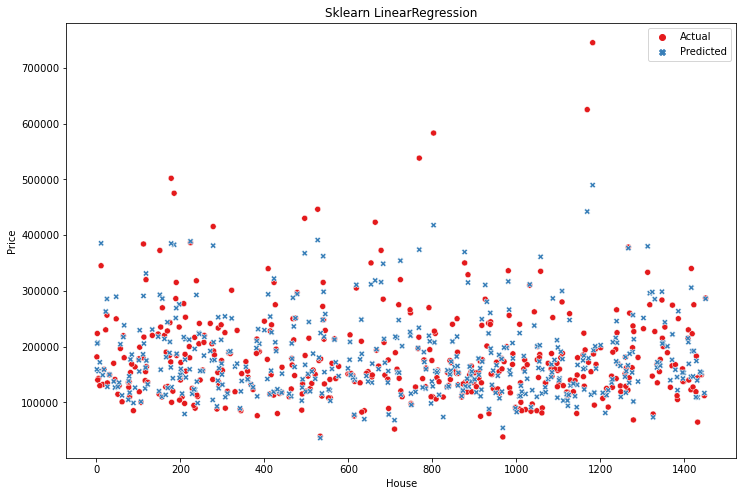

In [188]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_pred.drop('Dif',axis=1),palette="Set1",sizes=(15,20))
plt.title('Sklearn LinearRegression')
plt.xlabel('House')
plt.ylabel('Price');

### 6.2 Ridge

In [202]:
ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [203]:
pred_ridge = ridge.predict(x_test)

df_pred_ridge = pd.DataFrame({'Actual':y_test, 'Pred':pred_ridge,'Dif':pred_ridge-y_test})
df_pred_ridge

,Actual,Pred,Dif
1058,335000,360990.396471,25990.396471
11,345000,385259.152007,40259.152007
464,124000,110849.058279,-13150.941721
521,150000,142146.676903,-7853.323097
1367,127000,139561.992383,12561.992383
...,...,...,...
604,221000,208336.601196,-12663.398804
965,178900,177738.391390,-1161.608610
1070,135000,118251.845212,-16748.154788
513,134000,155314.935461,21314.935461


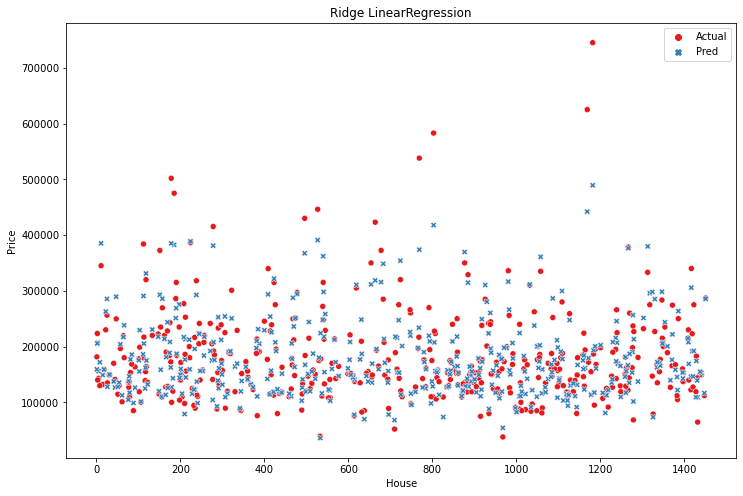

In [204]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_pred_ridge.drop('Dif',axis=1),palette="Set1",sizes=(15,20))
plt.title('Ridge LinearRegression')
plt.xlabel('House')
plt.ylabel('Price');

In [209]:
r2_ridge = ridge.score(x_test,y_test)
r2_ridge

0.834054343804824

In [213]:
pd.DataFrame([[r2_sk,r2_ridge]],columns=['Sklearn','Ridge'],index=['R2 Test'])

,Sklearn,Ridge
R2 Test,0.83414,0.834054


The Lineal Regression that appears to be a better fit according to the R2 is the one obtained with Sklearn.

## Source

##### De Cock, D. . (Unknown). House Prices - Advanced Regression Techniques. July 26 th 2022, from kaggle Web Site: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv
